In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 1. 법정동 코드 가공


In [14]:
locCode = pd.read_excel('../data/법정동코드.xlsx')
locCode_seoul = locCode[locCode['시도명']=='서울특별시']
locCode_seoul = locCode_seoul[~locCode_seoul['읍면동명'].isnull()]
locCode_seoul = locCode_seoul[['법정동코드','시도명','시군구명','읍면동명','생성일자']]
locCode_seoul.reset_index(drop=True, inplace=True)

locCode_seoul.head()

,법정동코드,시도명,시군구명,읍면동명,생성일자
0,1111010100,서울특별시,종로구,청운동,19880423
1,1111010200,서울특별시,종로구,신교동,19880423
2,1111010300,서울특별시,종로구,궁정동,19880423
3,1111010400,서울특별시,종로구,효자동,19880423
4,1111010500,서울특별시,종로구,창성동,19880423


# 2. 실거래가 데이터 가공


In [15]:
apt = pd.read_csv('../data/2019년 서울 아파트 실거래가.csv', encoding="cp949",thousands=',')
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73


In [16]:
# 거래금액 컬럼의 콤마(,) 제거 후 데이터 타입 변경..int64로

apt.dtypes

건축년도       int64
거래년도       int64
거래월        int64
거래일자       int64
법정동       object
거래금액       int64
아파트이름     object
전용면적     float64
지역코드       int64
층          int64
지번        object
dtype: object

In [17]:
# 전용면적(제곱미터)를 평으로 변환(나누기 3.306)하여 전용면적(평) 컬럼 생성 후 소숫점 둘쨰자리까지 표시합니다.

apt['전용면적(평)']=(apt['전용면적']/3.306).round(2)
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평)
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52


In [18]:
# 전용면적을 범주화 하기 위해 전용면적(평) 컬럼을 정수형으로 바꾼 새로운 컬럼을 생성합니다.
# 컬럼명 전용면적2(평)

apt['전용면적(평)2']=apt['전용면적(평)'].astype(int)
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45


In [19]:
# 전용면적을 범주화 합니다.
# 컬럼명은 전용면적(평)3

bins=np.arange(0,86,5)
bins
apt['전용면적(평)3'] = pd.cut(apt['전용면적(평)2'], bins)
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]"
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]"
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]"
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]"
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]"


In [20]:
# 범주화된 전용면적의 고유값을 확인합니다.
apt['전용면적(평)3'].unique()

[(25, 30], (45, 50], (35, 40], (40, 45], (0, 5], ..., (65, 70], (55, 60], (60, 65], (80, 85], (75, 80]]
Length: 17
Categories (17, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (65, 70] < (70, 75] < (75, 80] < (80, 85]]

# 3. 데이타 프레임 병합


In [21]:
# locCode_seoul.rename(columns={'읍면동명':'법정동'},inplace=True)
# locCode_seoul.head()

# locCode_seoul.sort_values(by='법정동', inplace=True)
# locCode_seoul.reset_index(drop=True, inplace=True)
locCode_seoul.head()


,법정동코드,시도명,시군구명,읍면동명,생성일자
0,1111010100,서울특별시,종로구,청운동,19880423
1,1111010200,서울특별시,종로구,신교동,19880423
2,1111010300,서울특별시,종로구,궁정동,19880423
3,1111010400,서울특별시,종로구,효자동,19880423
4,1111010500,서울특별시,종로구,창성동,19880423


In [22]:
locCode_seoul['지역코드'] = locCode_seoul['법정동코드'].astype("str").str.slice(start=0, stop=5)
locCode_seoul['지역코드_법정동'] = locCode_seoul['지역코드']+locCode_seoul['법정동']
locCode_seoul.head()

KeyError: '법정동'

In [ ]:
apt['법정동'] = apt['법정동'].str.slice(start=1, stop=4)
apt.head()

In [23]:
# apt['거래금액(평당)']=(apt['거래금액']/apt['전용면적(평)2']).round(2)
# apt.sort_values('거래금액(평당)',ascending=False)


# 4. 데이타 분석


# 5. 시각화

시각화 그래프는 7개 이상 나와야 합니다.
- 각각의 그래프마다 분석에 있어서 세웠던 전략과 시각화 목적을 간단한 코멘트를 달아주세요
수업시간에 언급하지 않은 새로운 패턴의 그래프는 3개 이상 사용하시기 바랍니다.
- 그래프에 대한 간단한 설명과 함께 코멘트로 직접 달아주세요

작업시간은 오후 3시까지 생각하고 있습니다.
- 최종 발표시간은 4시입니다.

Text(0.5, 0, '아파트 층')

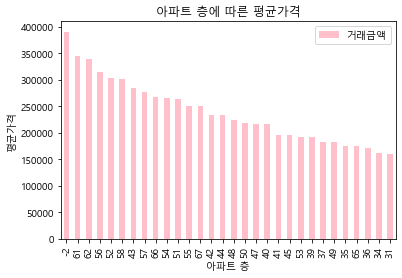

In [24]:
# 아파트 층에 따른 가격
'''
아파트 층에 따른 평균 가격. 

'''
apt.pivot_table('거래금액','층',aggfunc='mean').round(2).sort_values('거래금액',ascending=False).head(30).plot(kind='bar',color='pink')
plt.title('아파트 층에 따른 평균가격')
plt.ylabel('평균가격')
plt.xlabel('아파트 층')


Text(0.5, 0, '아파트 층')

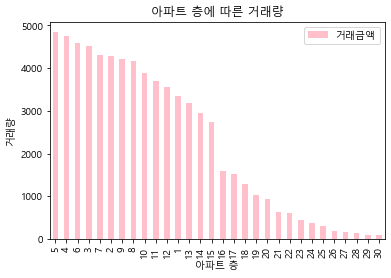

In [25]:
# 아파트 층에 따른 거래량
'''
선호하는 아파트의 특정 층을 알 수 있음. 
'''
apt.pivot_table('거래금액','층',aggfunc='count').round(2).sort_values('거래금액',ascending=False).head(30).plot(kind='bar',color='pink')
plt.title('아파트 층에 따른 거래량')
plt.ylabel('거래량')
plt.xlabel('아파트 층')

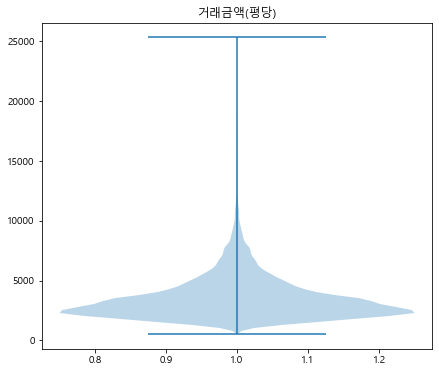

In [26]:
# 평당 거래금액 전체 분포
'''

평당 거래금액의 분포가 5000~0 사이에 집중된 모습을 보이고 있지만, 최고가는 25000

'''

apt['거래금액(평당)']=(apt['거래금액']/apt['전용면적(평)2']).round(2)
apt.sort_values('거래금액(평당)',ascending=False)
plt.figure(figsize=(7,6)) # 크기 지정
plt.violinplot(apt['거래금액(평당)'])
plt.xlim()
plt.title('거래금액(평당)')
plt.show()

In [189]:
apt.pivot_table(['거래금액(평당)'],'건축년도',aggfunc=['count','mean'])

,count,mean
,거래금액(평당),거래금액(평당)
건축년도,,
1961,1,1062.500000
1965,1,3423.080000
1966,5,3645.000000
1968,16,1771.881875
1969,35,2248.948000
1970,41,2703.323659
1971,128,3499.958828
1972,27,1716.698148


In [204]:
apt.pivot_table(['거래금액(평당)'],'법정동',aggfunc=['count','mean']).sort_values(('mean', '거래금액(평당)'),ascending=False)

,count,mean
,거래금액(평당),거래금액(평당)
법정동,,
개포동,600,9922.017883
반포동,655,8416.897863
압구정,381,7939.926483
대치동,742,7433.626550
잠원동,467,7323.922120
...,...,...
산림동,3,1391.920000
궁동,20,1382.998000


In [224]:
apt[apt['건축년도']<2001].pivot_table('거래금액(평당)','건축년도',aggfunc=['count','mean'])

,count,mean
,거래금액(평당),거래금액(평당)
건축년도,,
1961,1,1062.500000
1965,1,3423.080000
1966,5,3645.000000
1968,16,1771.881875
1969,35,2248.948000
1970,41,2703.323659
1971,128,3499.958828
1972,27,1716.698148


In [225]:
apt[apt['건축년도']>2001].pivot_table('거래금액(평당)','건축년도',aggfunc=['count','mean'])

,count,mean
,거래금액(평당),거래금액(평당)
건축년도,,
2002,2173,2896.773613
2003,3489,2882.571035
2004,3639,2796.215878
2005,2556,3179.823682
2006,1983,3770.839859
2007,1750,3831.304189
2008,2532,4809.133211
2009,1496,4193.318884


In [240]:
apt.sort_values('층',ascending=False)

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,거래금액(평당)
35324,2003,2019,9,16,목동,211000,현대하이페리온,154.050,11470,67,916,46.60,46,"(45, 50]",4586.96
56180,2004,2019,5,2,도곡동,290000,타워팰리스3,163.944,11680,67,467-29,49.59,49,"(45, 50]",5918.37
59046,2004,2019,10,31,도곡동,284000,타워팰리스3,176.076,11680,66,467-29,53.26,53,"(50, 55]",5358.49
59035,2002,2019,10,29,도곡동,100000,타워팰리스1,78.990,11680,66,467,23.89,23,"(20, 25]",4347.83
59038,2002,2019,10,29,도곡동,420000,타워팰리스1,222.480,11680,66,467,67.30,67,"(65, 70]",6268.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804,2016,2019,12,4,옥수동,167000,옥수파크힐스101동~116동,76.660,11200,-1,528,23.19,23,"(20, 25]",7260.87
58728,2011,2019,10,14,논현동,40000,이산,64.230,11680,-1,194-22,19.43,19,"(15, 20]",2105.26
12401,2003,2019,3,1,장위동,24800,신장위아파트,80.390,11290,-1,230-214,24.32,24,"(20, 25]",1033.33
1540,2011,2019,2,8,한남동,630000,한남더힐,240.230,11170,-2,810,72.66,72,"(70, 75]",8750.00
